# 00a preprocess CITE-seq with demuxEM

Goal: Assign MPP identities to pooled cells that allow to demultiplex and repool at correct cell proportions 

Run with this command in docker container

docker run \
--rm \
-d \
--name demuxEM \
-p 8881:8888 \
-e JUPYTER_ENABLE_LAB=YES \
-v /Users/efast/Documents/:/home/jovyan/work \
pegasuspy_scanpy:vs1

## CT - demux

In [1]:
## clear variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import pegasus as pg
import anndata as an
import scanpy as sc
import pandas as pd
import numpy as np

### 1) Read in the matrices

In [4]:
# sample naming

sample = 'ct'

In [7]:
#input files

RNAmatrix = './raw_data/B_'+ sample +'/outs/filtered_feature_bc_matrix'
path = './raw_data/citeseq_MPP_'+ sample +'/'

#output files
#csv files
output_csv_adata_hto = './write/demux_adata_hto_'+ sample +'.csv'
output_csv_adata = './write/demux_adata_'+ sample +'.csv'
demux_result = './write/demux_result_'+ sample +'.csv'

# figures
figure_all_status = '_status_' + sample + '.pdf'
figure_ID = '_id_' + sample + '.pdf'

In [8]:
adata = sc.read_10x_mtx(
    RNAmatrix, var_names='gene_symbols', cache = True)

In [9]:
adata

AnnData object with n_obs × n_vars = 5064 × 31053 
    var: 'gene_ids', 'feature_types'

In [10]:
import os

adata_hto = sc.read_mtx(os.path.join(path,'umi_count/matrix.mtx.gz'))
adata_hto = adata_hto.T 

In [11]:
features = pd.read_csv(os.path.join(path, 'umi_count/features.tsv.gz'), header=None)
barcodes = pd.read_csv(os.path.join(path, 'umi_count/barcodes.tsv.gz'), header=None)
adata_hto.var_names = features[0]
adata_hto.obs_names = barcodes[0]

### 2) Some preprocessing

In [12]:
#need to remove the -1, and make the variables in data_hto a bit nicer

adata.obs.index = adata.obs.index.map(lambda x: x.rstrip('-1'))
adata_hto.var.index = adata_hto.var.index.map(lambda x: x.replace(x[-16:], ''))

In [13]:
adata_hto.var.index

Index(['ST', 'MPP', 'MPP2', 'CD48LSK', ''], dtype='object')

### 3) Run DemuxEM

In [14]:
# run DemuxEM

pg.estimate_background_probs(adata_hto)
pg.demultiplex(adata, adata_hto, alpha=-1.5, alpha_noise=2)
demux_result_df = pd.DataFrame(adata.obs['demux_type'].value_counts())
demux_result_df

2020-03-07 22:57:59,854 - pegasus - INFO - Time spent on 'demultiplex' = 29.29s.


,demux_type
singlet,4150
doublet,725
unknown,189


### 4) Plot and save

In [15]:
adata_hto.obs = adata_hto.obs.merge(adata.obs, left_index=True, right_index=True, how = 'left')

... storing 'hto_type' as categorical
... storing 'rna_type' as categorical


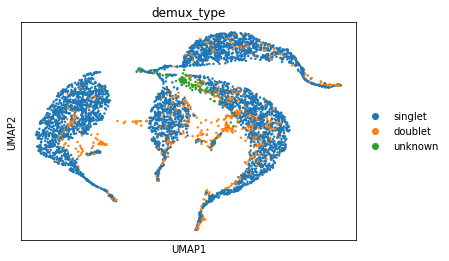

In [16]:
# plot the assignments see how it looks

sc.pp.neighbors(adata_hto, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_hto)
sc.pl.umap(adata_hto, color=['demux_type'], save=figure_all_status)

Trying to set attribute `.uns` of view, copying.


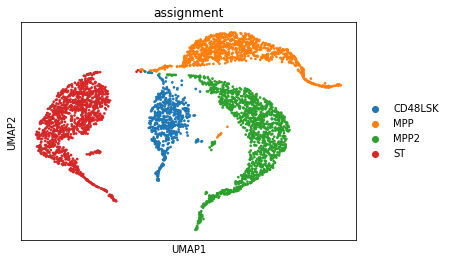

In [17]:
# plot only singlets
sc.pl.umap(adata_hto[adata_hto.obs['demux_type']=='singlet'], color=['assignment'], save=figure_ID)

In [18]:
adata_hto.obs.to_csv(output_csv_adata_hto)
adata.obs.to_csv(output_csv_adata)
demux_result_df.to_csv(demux_result)

# dmPGE2 - demux

In [19]:
## clear variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [20]:
import pegasus as pg
import anndata as an
import scanpy as sc
import pandas as pd
import numpy as np

### 1) Read in the matrices

In [21]:
# sample naming

sample = 'dmPGE2'

In [22]:
#input files

RNAmatrix = './raw_data/B_'+ sample +'/outs/filtered_feature_bc_matrix'
path = './raw_data/citeseq_MPP_'+ sample +'/'

#output files
#csv files
output_csv_adata_hto = './write/demux_adata_hto_'+ sample +'.csv'
output_csv_adata = './write/demux_adata_'+ sample +'.csv'
demux_result = './write/demux_result_'+ sample +'.csv'

# figures
figure_all_status = '_status_' + sample + '.pdf'
figure_ID = '_id_' + sample + '.pdf'

In [23]:
adata = sc.read_10x_mtx(
    RNAmatrix, var_names='gene_symbols', cache = True)

In [24]:
adata

AnnData object with n_obs × n_vars = 6497 × 31053 
    var: 'gene_ids', 'feature_types'

In [25]:
import os

adata_hto = sc.read_mtx(os.path.join(path,'umi_count/matrix.mtx.gz'))
adata_hto = adata_hto.T # maybe don't even need to transpose

In [26]:
features = pd.read_csv(os.path.join(path, 'umi_count/features.tsv.gz'), header=None)
barcodes = pd.read_csv(os.path.join(path, 'umi_count/barcodes.tsv.gz'), header=None)
adata_hto.var_names = features[0]
adata_hto.obs_names = barcodes[0]

### 2) Some preprocessing

In [27]:
#need to remove the -1, and make the variables in data_hto a bit nicer

adata.obs.index = adata.obs.index.map(lambda x: x.rstrip('-1'))
adata_hto.var.index = adata_hto.var.index.map(lambda x: x.replace(x[-16:], ''))

In [28]:
adata_hto.var.index

Index(['ST', 'MPP', 'MPP2', 'CD48LSK', ''], dtype='object')

### 3) Run DemuxEM

In [29]:
# run DemuxEM

pg.estimate_background_probs(adata_hto)
pg.demultiplex(adata, adata_hto, alpha=-1.5, alpha_noise=2)
demux_result_df = pd.DataFrame(adata.obs['demux_type'].value_counts())
demux_result_df

2020-03-07 23:21:01,071 - pegasus - INFO - Time spent on 'demultiplex' = 31.55s.


,demux_type
singlet,5841
doublet,595
unknown,61


### 4) Plot and save

In [30]:
adata_hto.obs = adata_hto.obs.merge(adata.obs, left_index=True, right_index=True, how = 'left')

... storing 'hto_type' as categorical
... storing 'rna_type' as categorical


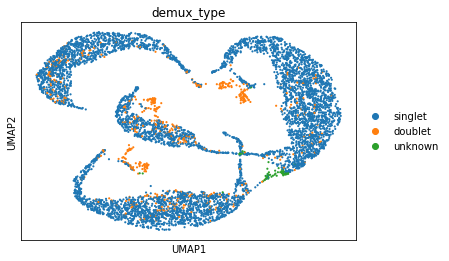

In [31]:
# plot the assignments see how it looks

sc.pp.neighbors(adata_hto, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_hto)
sc.pl.umap(adata_hto, color=['demux_type'], save=figure_all_status)

Trying to set attribute `.uns` of view, copying.


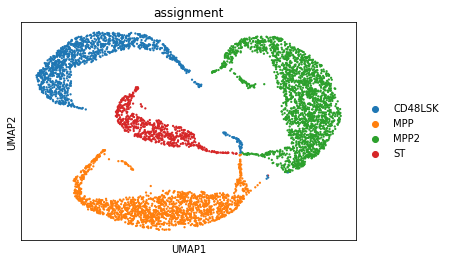

In [32]:
# plot only singlets
sc.pl.umap(adata_hto[adata_hto.obs['demux_type']=='singlet'], color=['assignment'], save=figure_ID)

In [33]:
adata_hto.obs.to_csv(output_csv_adata_hto)
adata.obs.to_csv(output_csv_adata)
demux_result_df.to_csv(demux_result)

# GCSF - demux

In [34]:
## clear variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [35]:
import pegasus as pg
import anndata as an
import scanpy as sc
import pandas as pd
import numpy as np

### 1) Read in the matrices

In [36]:
# sample naming

sample = 'GCSF'

In [37]:
#input files

RNAmatrix = './raw_data/B_'+ sample +'/outs/filtered_feature_bc_matrix'
path = './raw_data/citeseq_MPP_'+ sample +'/'

#output files
#csv files
output_csv_adata_hto = './write/demux_adata_hto_'+ sample +'.csv'
output_csv_adata = './write/demux_adata_'+ sample +'.csv'
demux_result = './write/demux_result_'+ sample +'.csv'

# figures
figure_all_status = '_status_' + sample + '.pdf'
figure_ID = '_id_' + sample + '.pdf'

In [38]:
adata = sc.read_10x_mtx(
    RNAmatrix, var_names='gene_symbols', cache = True)

In [39]:
adata

AnnData object with n_obs × n_vars = 5292 × 31053 
    var: 'gene_ids', 'feature_types'

In [40]:
import os

adata_hto = sc.read_mtx(os.path.join(path,'umi_count/matrix.mtx.gz'))
adata_hto = adata_hto.T # maybe don't even need to transpose

In [41]:
features = pd.read_csv(os.path.join(path, 'umi_count/features.tsv.gz'), header=None)
barcodes = pd.read_csv(os.path.join(path, 'umi_count/barcodes.tsv.gz'), header=None)
adata_hto.var_names = features[0]
adata_hto.obs_names = barcodes[0]

### 2) Some preprocessing

In [42]:
#need to remove the -1, and make the variables in data_hto a bit nicer

adata.obs.index = adata.obs.index.map(lambda x: x.rstrip('-1'))
adata_hto.var.index = adata_hto.var.index.map(lambda x: x.replace(x[-16:], ''))

In [43]:
adata_hto.var.index

Index(['ST', 'MPP', 'MPP2', 'CD48LSK', ''], dtype='object')

### 3) Run DemuxEM

In [44]:
# run DemuxEM

pg.estimate_background_probs(adata_hto)
pg.demultiplex(adata, adata_hto, alpha=-1.5, alpha_noise=2)
demux_result_df = pd.DataFrame(adata.obs['demux_type'].value_counts())
demux_result_df

2020-03-07 23:27:21,660 - pegasus - INFO - Time spent on 'demultiplex' = 35.15s.


,demux_type
singlet,4508
unknown,599
doublet,185


### 4) Plot and save

In [45]:
adata_hto.obs = adata_hto.obs.merge(adata.obs, left_index=True, right_index=True, how = 'left')

... storing 'hto_type' as categorical
... storing 'rna_type' as categorical


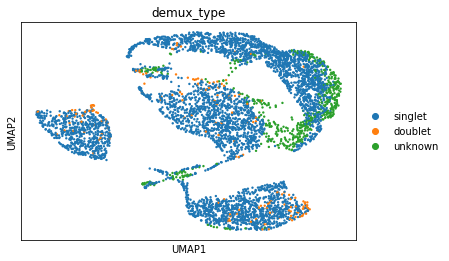

In [46]:
# plot the assignments see how it looks

sc.pp.neighbors(adata_hto, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_hto)
sc.pl.umap(adata_hto, color=['demux_type'], save=figure_all_status)

Trying to set attribute `.uns` of view, copying.


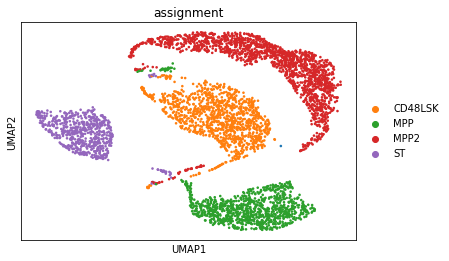

In [47]:
# plot only singlets
sc.pl.umap(adata_hto[adata_hto.obs['demux_type']=='singlet'], color=['assignment'], save=figure_ID)

In [48]:
adata_hto.obs.to_csv(output_csv_adata_hto)
adata.obs.to_csv(output_csv_adata)
demux_result_df.to_csv(demux_result)

# indo - demux

In [49]:
## clear variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [50]:
import pegasus as pg
import anndata as an
import scanpy as sc
import pandas as pd
import numpy as np

### 1) Read in the matrices

In [51]:
# sample naming

sample = 'indo'

In [52]:
#input files

RNAmatrix = './raw_data/B_'+ sample +'/outs/filtered_feature_bc_matrix'
path = './raw_data/citeseq_MPP_'+ sample +'/'

#output files
#csv files
output_csv_adata_hto = './write/demux_adata_hto_'+ sample +'.csv'
output_csv_adata = './write/demux_adata_'+ sample +'.csv'
demux_result = './write/demux_result_'+ sample +'.csv'

# figures
figure_all_status = '_status_' + sample + '.pdf'
figure_ID = '_id_' + sample + '.pdf'

In [53]:
adata = sc.read_10x_mtx(
    RNAmatrix, var_names='gene_symbols', cache = True)

In [54]:
adata

AnnData object with n_obs × n_vars = 4665 × 31053 
    var: 'gene_ids', 'feature_types'

In [55]:
import os

adata_hto = sc.read_mtx(os.path.join(path,'umi_count/matrix.mtx.gz'))
adata_hto = adata_hto.T # maybe don't even need to transpose

In [56]:
features = pd.read_csv(os.path.join(path, 'umi_count/features.tsv.gz'), header=None)
barcodes = pd.read_csv(os.path.join(path, 'umi_count/barcodes.tsv.gz'), header=None)
adata_hto.var_names = features[0]
adata_hto.obs_names = barcodes[0]

### 2) Some preprocessing

In [57]:
#need to remove the -1, and make the variables in data_hto a bit nicer

adata.obs.index = adata.obs.index.map(lambda x: x.rstrip('-1'))
adata_hto.var.index = adata_hto.var.index.map(lambda x: x.replace(x[-16:], ''))

In [58]:
adata_hto.var.index

Index(['ST', 'MPP', 'MPP2', 'CD48LSK', ''], dtype='object')

### 3) Run DemuxEM

In [59]:
# run DemuxEM

pg.estimate_background_probs(adata_hto)
pg.demultiplex(adata, adata_hto, alpha=-5, alpha_noise=2.5)
demux_result_df = pd.DataFrame(adata.obs['demux_type'].value_counts())
demux_result_df

2020-03-07 23:29:30,385 - pegasus - INFO - Time spent on 'demultiplex' = 23.90s.


,demux_type
singlet,3695
doublet,492
unknown,478


### 4) Plot and save

In [60]:
adata_hto.obs = adata_hto.obs.merge(adata.obs, left_index=True, right_index=True, how = 'left')

... storing 'hto_type' as categorical
... storing 'rna_type' as categorical


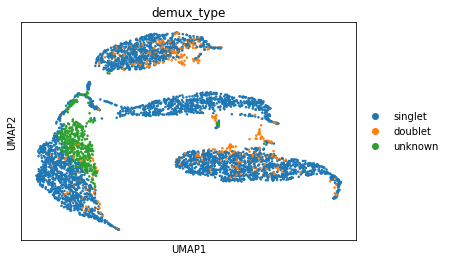

In [61]:
# plot the assignments see how it looks

sc.pp.neighbors(adata_hto, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_hto)
sc.pl.umap(adata_hto, color=['demux_type'], save=figure_all_status)

Trying to set attribute `.uns` of view, copying.


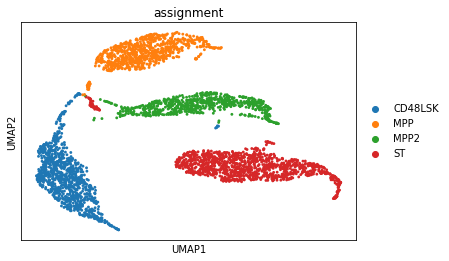

In [62]:
# plot only singlets
sc.pl.umap(adata_hto[adata_hto.obs['demux_type']=='singlet'], color=['assignment'], save=figure_ID)

In [63]:
adata_hto.obs.to_csv(output_csv_adata_hto)
adata.obs.to_csv(output_csv_adata)
demux_result_df.to_csv(demux_result)

# pIC - demux

In [64]:
## clear variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [65]:
import pegasus as pg
import anndata as an
import scanpy as sc
import pandas as pd
import numpy as np

### 1) Read in the matrices

In [66]:
# sample naming

sample = 'pIC'

In [67]:
#input files

RNAmatrix = './raw_data/B_'+ sample +'/outs/filtered_feature_bc_matrix'
path = './raw_data/citeseq_MPP_'+ sample +'/'

#output files
#csv files
output_csv_adata_hto = './write/demux_adata_hto_'+ sample +'.csv'
output_csv_adata = './write/demux_adata_'+ sample +'.csv'
demux_result = './write/demux_result_'+ sample +'.csv'

# figures
figure_all_status = '_status_' + sample + '.pdf'
figure_ID = '_id_' + sample + '.pdf'

In [68]:
adata = sc.read_10x_mtx(
    RNAmatrix, var_names='gene_symbols', cache = True)

In [69]:
adata

AnnData object with n_obs × n_vars = 5035 × 31053 
    var: 'gene_ids', 'feature_types'

In [70]:
import os

adata_hto = sc.read_mtx(os.path.join(path,'umi_count/matrix.mtx.gz'))
adata_hto = adata_hto.T # maybe don't even need to transpose

In [71]:
features = pd.read_csv(os.path.join(path, 'umi_count/features.tsv.gz'), header=None)
barcodes = pd.read_csv(os.path.join(path, 'umi_count/barcodes.tsv.gz'), header=None)
adata_hto.var_names = features[0]
adata_hto.obs_names = barcodes[0]

### 2) Some preprocessing

In [72]:
#need to remove the -1, and make the variables in data_hto a bit nicer

adata.obs.index = adata.obs.index.map(lambda x: x.rstrip('-1'))
adata_hto.var.index = adata_hto.var.index.map(lambda x: x.replace(x[-16:], ''))

In [73]:
adata_hto.var.index

Index(['ST', 'MPP', 'MPP2', 'CD48LSK', ''], dtype='object')

### 3) Run DemuxEM

In [74]:
# run DemuxEM

pg.estimate_background_probs(adata_hto)
pg.demultiplex(adata, adata_hto, alpha=-1.5, alpha_noise=2)
demux_result_df = pd.DataFrame(adata.obs['demux_type'].value_counts())
demux_result_df

2020-03-07 23:32:59,025 - pegasus - INFO - Time spent on 'demultiplex' = 20.70s.


,demux_type
singlet,4717
doublet,251
unknown,67


### 4) Plot and save

In [75]:
adata_hto.obs = adata_hto.obs.merge(adata.obs, left_index=True, right_index=True, how = 'left')

... storing 'hto_type' as categorical
... storing 'rna_type' as categorical


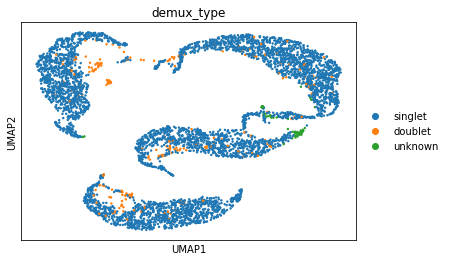

In [76]:
# plot the assignments see how it looks

sc.pp.neighbors(adata_hto, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata_hto)
sc.pl.umap(adata_hto, color=['demux_type'], save=figure_all_status)

Trying to set attribute `.uns` of view, copying.


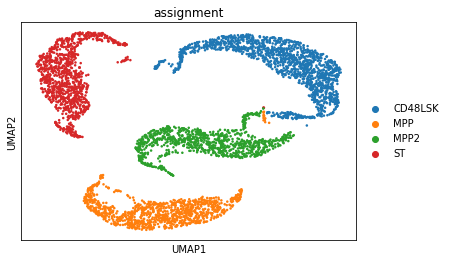

In [77]:
# plot only singlets
sc.pl.umap(adata_hto[adata_hto.obs['demux_type']=='singlet'], color=['assignment'], save=figure_ID)

In [78]:
adata_hto.obs.to_csv(output_csv_adata_hto)
adata.obs.to_csv(output_csv_adata)
demux_result_df.to_csv(demux_result)

In [79]:
sc.logging.print_versions()
pd.show_versions()

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.17.3 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1.post1

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.19.76-linuxkit
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 0.25.3
numpy            : 1.17.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 19.3.1
setuptools       : 41.6.0.post20191101
Cython           : 0.29.14
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 1.2.8
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          :